In [72]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



In [73]:
netflix_df=pd.read_csv("netflix_data.csv")

In [74]:
netflix_df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,4,In a future where the elite inhabit an island ...,International TV
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas


In [75]:
def missingdata(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    ms=pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    ms= ms[ms["Percent"] > 0]
    plt.subplots(figsize=(8,6))
    plt.xticks(rotation=90)
    sns.barplot(x=ms.index, y=ms["Percent"],color="green",alpha=0.8)
    plt.xlabel('Features', fontsize=15)
    plt.ylabel('Percent of missing values', fontsize=15)
    plt.title('Percent missing data by feature', fontsize=15)
    return ms
    

Checking for missing data

,Total,Percent
director,2389,30.679337
cast,718,9.220496
country,507,6.510851
date_added,10,0.128419


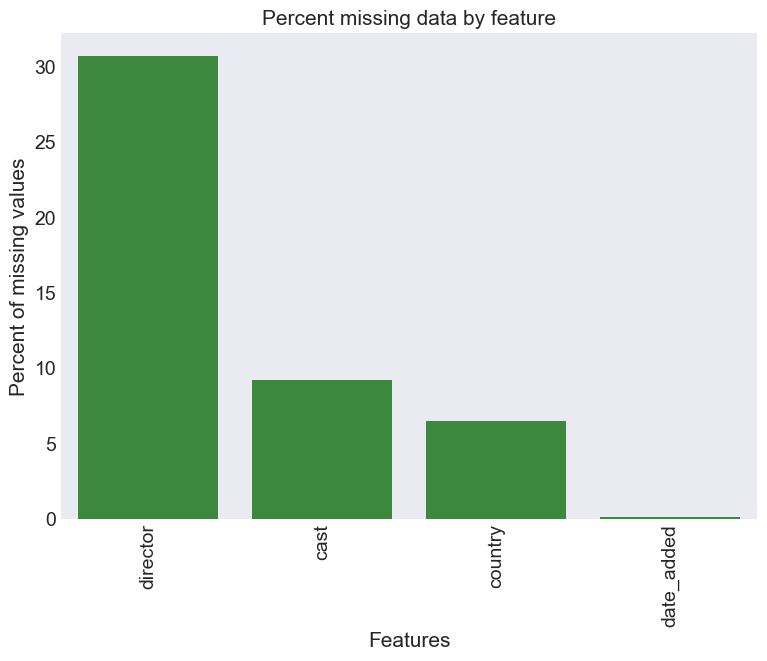

In [76]:
missingdata(netflix_df)

Taking movies only and putting in netflix_movies dataframe

In [77]:
filt=netflix_df["type"]=="Movie"
netflix_movies=netflix_df[filt]
netflix_movies.drop(columns=["show_id","type","director","cast","date_added","description"],inplace=True)

C:\Users\Darren\AppData\Local\Temp\ipykernel_7696\3826030671.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_movies.drop(columns=["show_id","type","director","cast","date_added","description"],inplace=True)


In [78]:
netflix_movies.head(5)

,title,country,release_year,duration,genre
1,7:19,Mexico,2016,93,Dramas
2,23:59,Singapore,2011,78,Horror Movies
3,9,United States,2009,80,Action
4,21,United States,2008,123,Dramas
6,122,Egypt,2019,95,Horror Movies



What type of genres belong to shows that are less than 60 mins?

In [79]:
filt=netflix_movies["duration"]<60
short_movies=netflix_movies[filt]


In [80]:
short_movies.head()

,title,country,release_year,duration,genre
35,#Rucker50,United States,2016,56,Documentaries
55,100 Things to do Before High School,United States,2014,44,Uncategorized
67,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,2017,37,Uncategorized
101,3 Seconds Divorce,Canada,2018,53,Documentaries
146,A 3 Minute Hug,Mexico,2019,28,Documentaries


In [81]:
short_movies['genre'].value_counts()

genre
Documentaries           151
Children                107
Stand-Up                 72
Uncategorized            40
Comedies                 15
Dramas                   12
Classic Movies            8
Action                    6
International Movies      3
Anime Features            3
Music                     2
Horror Movies             1
Name: count, dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'Documentaries'),
  Text(1, 0, 'Uncategorized'),
  Text(2, 0, 'Children'),
  Text(3, 0, 'Stand-Up'),
  Text(4, 0, 'Comedies'),
  Text(5, 0, 'Dramas'),
  Text(6, 0, 'International Movies'),
  Text(7, 0, 'Action'),
  Text(8, 0, 'Music'),
  Text(9, 0, 'Classic Movies'),
  Text(10, 0, 'Anime Features'),
  Text(11, 0, 'Horror Movies')])

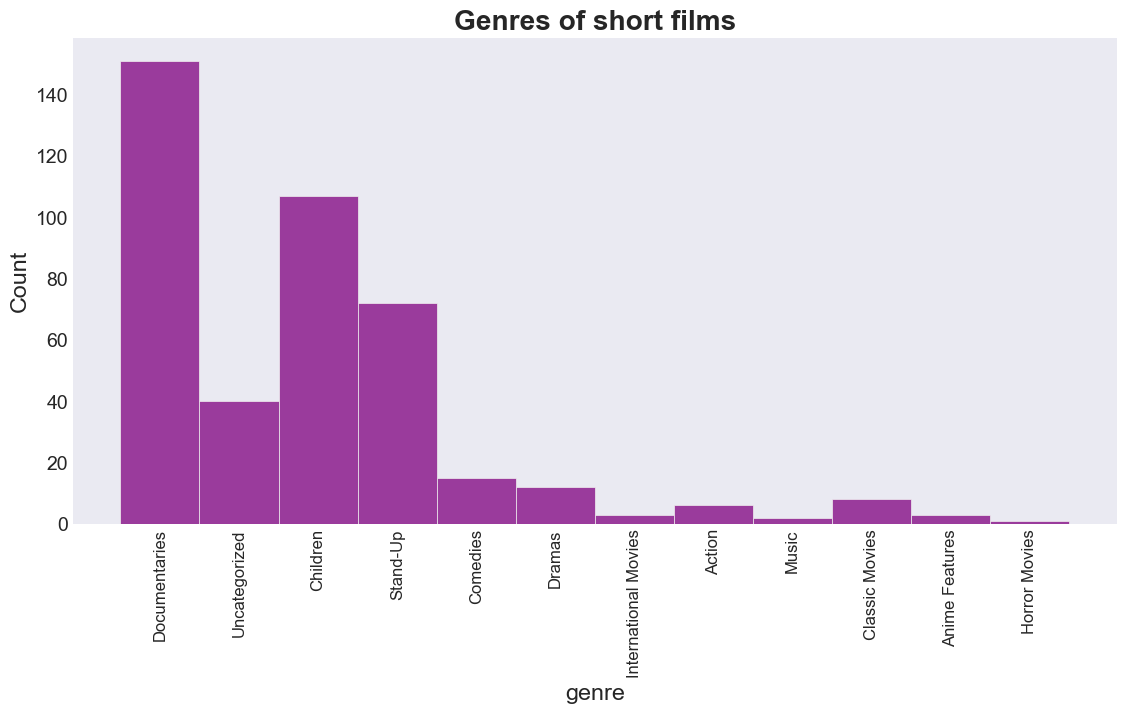

In [82]:
plt.style.use("seaborn-v0_8-dark")
plt.figure(figsize=(12,6))
sns.histplot(short_movies,x="genre",color="purple")
plt.title("Genres of short films",weight="bold")
plt.xticks(rotation=90,fontsize=12)


Creating Pie Chart for better visualisation

(-1.0999984305966797,
 1.0999999217070027,
 -1.0999999954840267,
 1.0999999152539683)

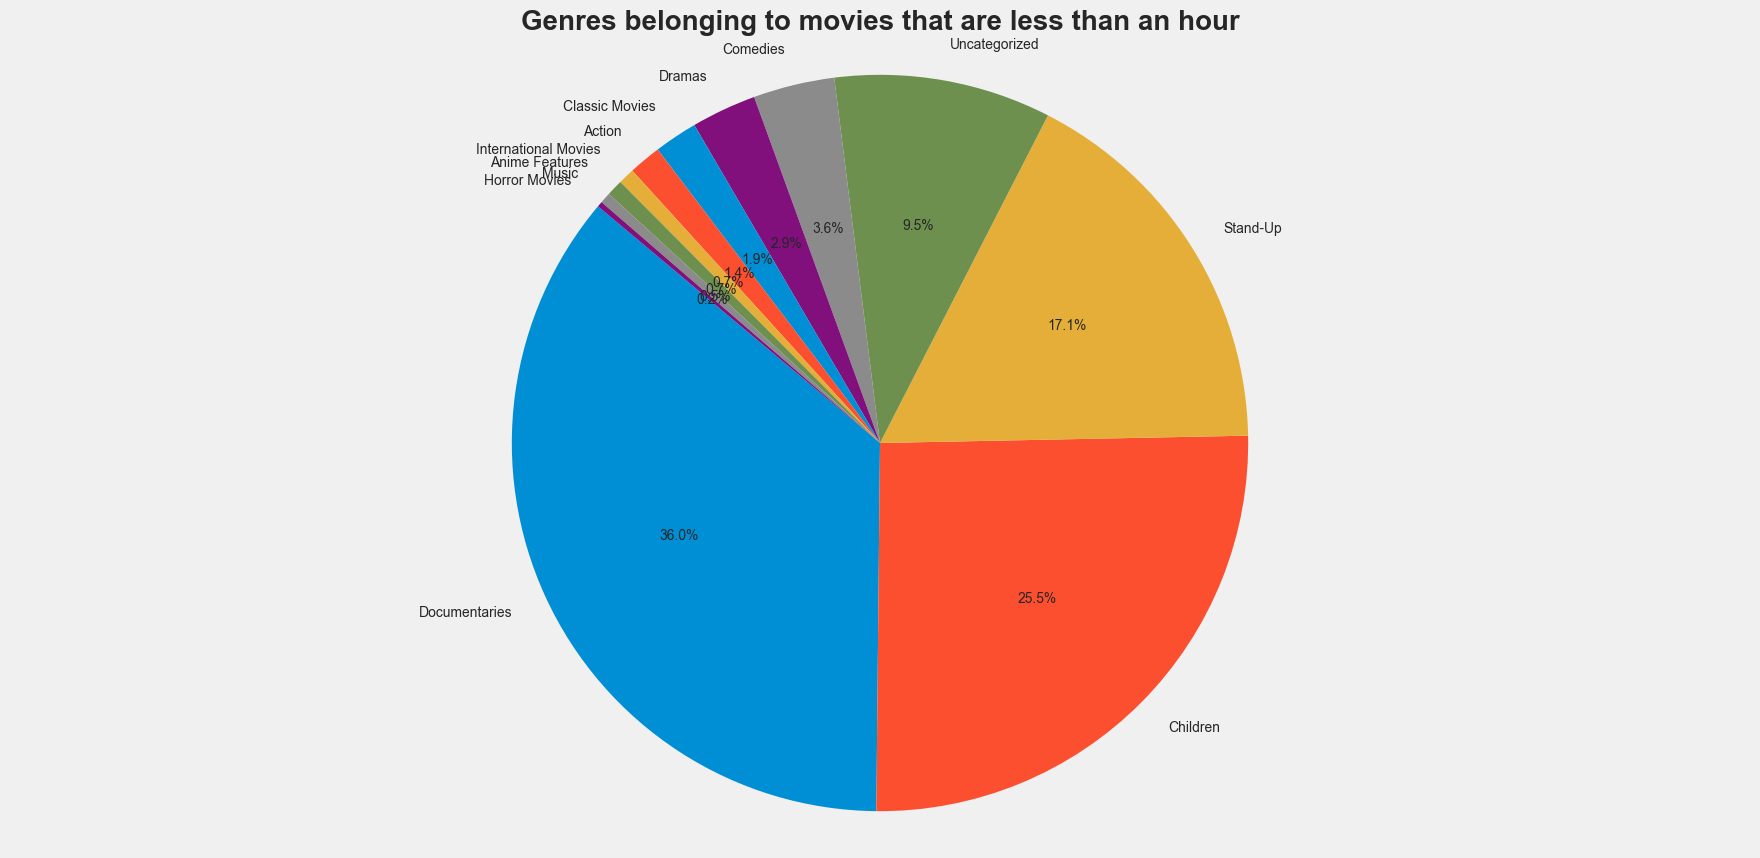

In [83]:

# Calculate genre counts
genre_counts = short_movies['genre'].value_counts().sort_values(ascending=False)

# Create the figure with desired size
plt.style.use("fivethirtyeight")  # Apply the fivethirtyeight style
plt.figure(figsize=(20, 10))  # Adjust figure size for pie chart

# Create the pie chart
plt.pie(genre_counts, labels=genre_counts.index, autopct="%1.1f%%", startangle=140,textprops={'fontsize':10})  # Customize labels and starting angle

# Add title
plt.title("Genres belonging to movies that are less than an hour", weight="bold",size=20)

plt.axis('equal')  # Equal aspect ratio for a circular pie chart




Replacing all other genres with "Others" except "Children","Documentaries","Stand-Up"

In [84]:
netflix_movies["genre"].unique()

array(['Dramas', 'Horror Movies', 'Action', 'Documentaries',
       'Independent Movies', 'Comedies', 'Sports Movies', 'Uncategorized',
       'International Movies', 'Sci-Fi', 'Children', 'Classic Movies',
       'Thrillers', 'Stand-Up', 'Anime Features', 'Music', 'Cult Movies',
       'Romantic Movies', 'LGBTQ Movies'], dtype=object)

In [85]:
specific_words = ["Children","Documentaries","Stand-Up"]
pattern = '|'.join(specific_words)
netflix_movies["genre"]=netflix_movies["genre"].str.replace(f'^(?!{pattern}$).*', 'Others', regex=True)

C:\Users\Darren\AppData\Local\Temp\ipykernel_7696\4198072118.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_movies["genre"]=netflix_movies["genre"].str.replace(f'^(?!{pattern}$).*', 'Others', regex=True)


In [86]:
netflix_movies["genre"].unique()

array(['Others', 'Documentaries', 'Children', 'Stand-Up'], dtype=object)

In [87]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

Movie Duration by Year of Release.


Text(0, 0.5, 'Duration (min)')

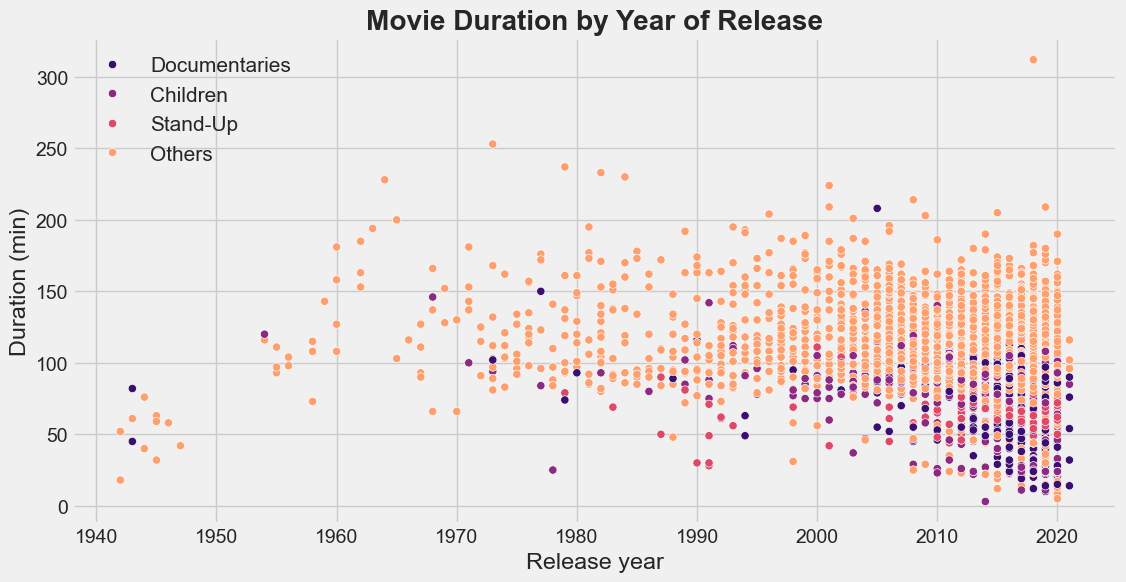

In [88]:

plt.style.use("fivethirtyeight")
plt.figure(figsize=(12,6))
sns.scatterplot(data=netflix_movies,x="release_year",y="duration",hue="genre",hue_order=["Documentaries","Children","Stand-Up","Others"],palette="magma")
plt.legend(loc=2,fontsize=15)
plt.title("Movie Duration by Year of Release",weight="bold")
plt.xlabel("Release year")
plt.ylabel("Duration (min)")

Removing NULL values

In [89]:

netflix_movies.isna().sum()

title             0
country         230
release_year      0
duration          0
genre             0
dtype: int64

In [90]:
netflix_movies.isna().count()

title           5377
country         5377
release_year    5377
duration        5377
genre           5377
dtype: int64

In [91]:
#missing values insignificant so omitting it out
netflix_movies=netflix_movies.dropna(subset="country")

In [92]:
#United States vs India
filt=df["country"].isin(["United States","India"])
df=df[filt]

In [93]:
df

,title,country,release_year,duration,genre
3,9,United States,2009,80,Others
4,21,United States,2008,123,Others
7,187,United States,1997,119,Others
8,706,India,2019,118,Others
9,1920,India,2008,143,Others
...,...,...,...,...,...
7776,Zokkomon,India,2011,104,Children
7778,Zombieland,United States,2009,88,Others
7780,Zoo,India,2018,94,Others
7781,Zoom,United States,2006,88,Children


United States vs India. Which country produces the longest movies?

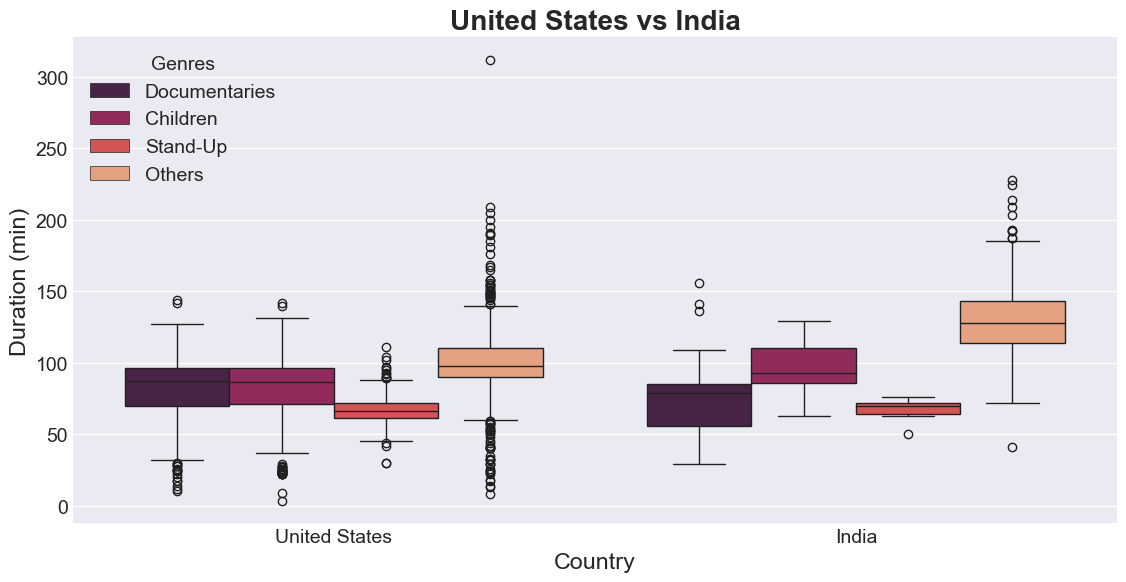

In [94]:
plt.style.use("seaborn-v0_8-darkgrid")
plt.figure(figsize=(12,6))
sns.boxplot(df,x="country",y="duration",hue="genre",palette="rocket",hue_order=["Documentaries","Children","Stand-Up","Others"])
plt.ylabel("Duration (min)")
plt.xlabel("Country")
plt.title("United States vs India",weight="bold")
plt.legend(title="Genres")
